In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = np.array([[40,20],[55,30],[70,60],[50,35],[45,40],[62,75],[45,30],[68,80],[80,70],[75,90]])

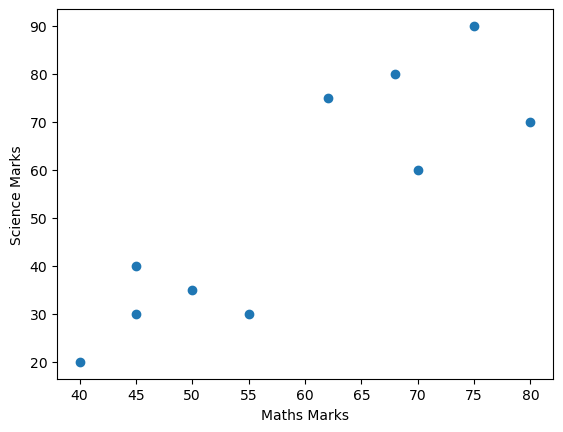

In [6]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Maths Marks')
plt.ylabel('Science Marks')
plt.show()

In [9]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[-1.43299332 -1.39951173]
 [-0.3016828  -0.97541727]
 [ 0.82962771  0.29686613]
 [-0.67878631 -0.76337004]
 [-1.05588981 -0.5513228 ]
 [ 0.2262621   0.93300782]
 [-1.05588981 -0.97541727]
 [ 0.67878631  1.14505506]
 [ 1.58383472  0.72096059]
 [ 1.20673122  1.56914952]]


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(scaled_data)

PCA(n_components=1)

In [16]:
pca.explained_variance_ratio_

array([0.93500282])

In [18]:
#scaling data using pca transform
pca_scaled_data = pca.transform(scaled_data)
scaled_data.shape,pca_scaled_data.shape

((10, 2), (10, 1))

In [19]:
pca_scaled_data = pca.inverse_transform(pca_scaled_data)

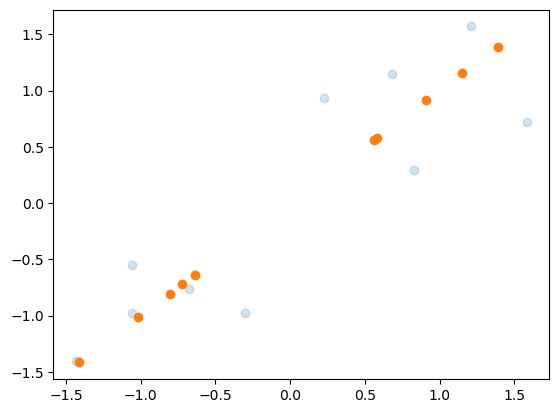

In [21]:
#plot the scalted data and pca scaled data
plt.scatter(scaled_data[:,0],scaled_data[:,1],alpha = 0.2)
plt.scatter(pca_scaled_data[:,0],pca_scaled_data[:,1])

# PCA for visualization

In [23]:
#import the data from dataset library
#this data set shows how number represent using image
from sklearn.datasets import load_digits
digits = load_digits()

In [27]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

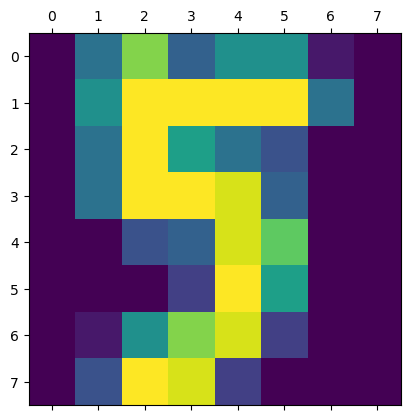

In [31]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[33])
plt.show()

In [32]:
digits.target[33]

5

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_digits = pca.fit_transform(digits.data)

In [35]:
digits.data.shape

(1797, 64)

In [36]:
new_digits.data.shape

(1797, 2)

Text(0, 0.5, 'PC2')

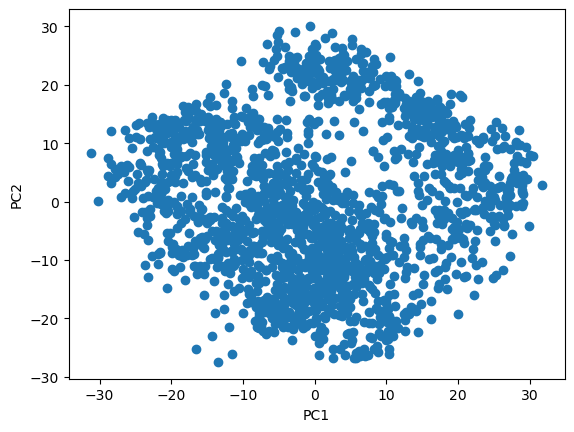

In [39]:
plt.scatter(new_digits[:,0],new_digits[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

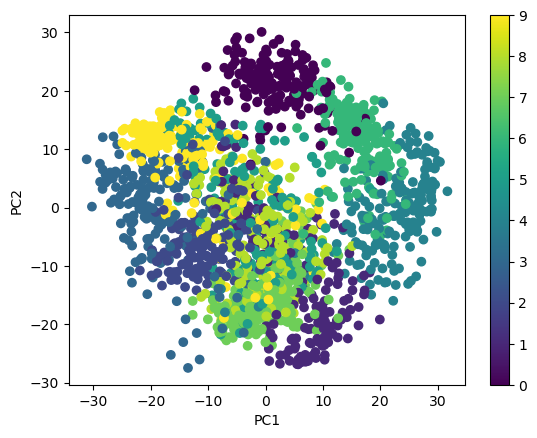

In [41]:
#to find classes that means we want what number that it represent
plt.scatter(new_digits[:,0],new_digits[:,1],c = digits.target)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')

# PCA for speed up models

In [43]:
from sklearn.datasets import load_digits
import numpy as np

In [44]:
digits = load_digits()

In [46]:
digits.data.shape

(1797, 64)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(digits.data)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_data,digits.target,test_size=0.2,random_state=42)

In [52]:
x_train.shape

(1437, 64)

In [58]:
x_test

array([[ 0.        , -0.33501649, -1.09493684, ...,  1.22664392,
         0.71700059, -0.19600752],
       [ 0.        , -0.33501649,  1.21914597, ..., -0.97712664,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  0.58803248, ...,  0.20951905,
        -0.5056698 , -0.19600752],
       ...,
       [ 0.        , -0.33501649,  0.37766131, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  0.37766131, ...,  1.56568555,
         0.47246651, -0.19600752],
       [ 0.        , -0.33501649,  1.85025947, ..., -0.29904339,
        -0.5056698 , -0.19600752]])

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=1000)

import time
start = time.time()
model.fit(x_train,y_train)
end = time.time()
print((end - start)*1000)

16.73722267150879


In [60]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.9722222222222222

## cheack the speed

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca_new_data = pca.fit_transform(new_data)

In [69]:
pca_new_data.shape

(1797, 20)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(pca_new_data,digits.target,test_size=0.2,random_state=42)

In [71]:
x_train.shape

(1437, 20)

In [72]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=1000)

import time
start = time.time()
model.fit(x_train,y_train)
end = time.time()
print((end - start)*1000)

17.89546012878418


In [73]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.9472222222222222